
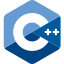
<br>

<div style="text-align:center; font-size:200%;">
 <b>Konstruktoren</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 08 Konstruktoren.ipynb -->
<!-- slides/module_150_classes/topic_160_constructors.cpp -->


## Konstruktoren

- Unsere `MyVector`-Implementierung kann im Moment nur als leerer Vektor
  konstruiert werden.
- Wir würden gerne auch einen Vektor mit vorgegebener Größe oder
  Initialwerten konstruieren können.
- Dafür können wir einen *Konstruktor* definieren.


- Ein Konstruktor ist eine spezielle Funktion, die automatisch aufgerufen wird,
  wenn ein Objekt erzeugt wird.
- Der Name des Konstruktors ist immer der Name der Klasse.
- Ein Konstruktor hat keinen Rückgabetyp, nicht einmal `void`.
- Ein Konstruktor kann überladen werden.


### Default-Konstruktor

- Ein Konstruktor ohne Parameter wird *Default-Konstruktor* genannt.
- Wenn wir keinen Konstruktor definieren, wird automatisch ein
  Default-Konstruktor erzeugt.
- Der Default-Konstruktor default-initialisiert alle Member-Variablen
  - Wenn wir Default-Member-Initializer angeben, werden diese verwendet.
- Der Default-Konstruktor wird *nur* erzeugt, wenn wir *keinen* Konstruktor
  definieren.
- Wir können die Default-Implementierung explizit mit `= default;` erzeugen.
- Wir können mit `= delete;` verhindern, dass ein Default-Konstruktor
  erzeugt wird.

In [ ]:
class MyVector
{
public:
    // Synthetisierter Default-Konstruktor
    MyVector() = default;
    MyVector(std::size_t size);
    // Delegierender Konstruktor (siehe Implementierung)
    MyVector(std::size_t size, int value);
    MyVector(std::initializer_list<int> init);

    void print();

private:
    std::size_t size_{0};     // Beide Member haben Default-Member-Initializer
    int* data_{nullptr};
};


## Member-Initialisierungsliste

- Ein Konstruktor kann eine Member-Initialisierungsliste haben.
- In der Member-Initialisierungsliste werden die Member-Variablen
  initialisiert.
- Die Member-Variablen werden in der Reihenfolge initialisiert, in der sie
  **in der Klasse** deklariert wurden.
- Die Member-Initialisierungsliste wird durch einen Doppelpunkt `:` vom
  Konstruktor-Rumpf getrennt.
- Viele Konstruktoren haben eine Member-Initialisierungsliste, gefolgt von
  einem leeren Rumpf.

In [ ]:
MyVector::MyVector(std::size_t size) : size_(size), data_(new int[size_]) { }


### Delegierender Konstruktor

- Ein Konstruktor kann einen anderen Konstruktor aufrufen.
- Dieser Konstruktor wird *delegierender Konstruktor* genannt.
- Der delegierende Konstruktor muss den anderen Konstruktor in der
  Member-Initialisierungsliste aufrufen.
- Es dürfen dann keine weiteren Member-Initializer angegeben werden.

In [ ]:
MyVector::MyVector(std::size_t size, int value) : MyVector(size)
{
    for (std::size_t i{0}; i != size_; ++i) {
        data_[i] = value;
    }
}


- Dieser Overload ermöglicht es, einen `MyVector` mit einer
  Initialisierungsliste von Werten zu initialisieren.
- Wenn ein Konstruktor für den Typ `initializer_list<T>` definiert wird,
  dann wird er für Initialisierungslisten vom Typ `T` verwendet.
- Initialisierungslisten mit anderen Typen werden wie üblich behandelt.

In [ ]:
MyVector::MyVector(std::initializer_list<int> init)
    : size_(init.size()), data_(new int[size_])
{
    std::copy(init.begin(), init.end(), data_);
}

In [ ]:
#include <iostream>

In [ ]:
void MyVector::print()
{
    std::cout << "size: " << size_ << "\n";
    std::cout << "data: ";
    for (int i = 0; i != size_; ++i) {
        std::cout << data_[i] << " ";
    }
    std::cout << "\n";
}

In [ ]:
MyVector v1{};

In [ ]:
v1.print();

In [ ]:
MyVector v2(5);

In [ ]:
v2.print();

In [ ]:
MyVector v3(5, 42);

In [ ]:
v3.print();

In [ ]:
MyVector v4{1, 2, 3, 4, 5, 6, 7, 8, 9, 10};

In [ ]:
v4.print();


## Konvertierende Konstruktoren

- Aus Gründen, die wir später sehen werden, heißen die Konstruktoren, die
  wir in diesem Abschnitt gesehen haben, *konvertierende Konstruktoren*.


## Mini-Workshop: Todo-Liste

In dieser Aufgabe sollen Sie eine einfache Todo-Liste implementieren.

- Jede Aufgabe in der Todo-Liste hat einen Titel und einen Booleschen Status
  (`done`).
- Implementieren Sie eine Struct `Item` zur Repräsentation einer Aufgabe.
  - Implementieren Sie einen Konstruktor für `Item`, der einen Titel
    akzeptiert und den Status auf `false` setzt.
  - Implementieren Sie einen Konstruktor für `Item`, der einen Titel und
    einen Status akzeptiert.
  - Können Sie diese beiden Konstruktoren kombinieren?
  - Können Sie `Item`-Instanzen ohne Argumente erzeugen, nachdem Sie diese
    Konstruktoren definiert haben?
  - Was passiert, wenn Sie keinen expliziten Konstruktor für `Item`
    definieren?


- Implementieren Sie eine Klasse `TodoList` zur Verwaltung einer Liste von
  Aufgaben.
  - Implementieren Sie einen Konstruktor für `TodoList`, der eine
    Initialisierungsliste von `Item`s akzeptiert.
  - Implementieren Sie eine Member-Funktion `print()`, die die Liste der
    Aufgaben ausgibt.
  - Welche Datenstruktur ist zur Speicherung der Aufgaben sinnvoll?
- Konstruieren Sie eine `TodoList` mit einigen Aufgaben und geben Sie diese
  aus.